In [1]:
# compare iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

>1 0.867 (0.054)
>2 0.878 (0.055)
>3 0.877 (0.055)
>4 0.869 (0.053)
>5 0.874 (0.055)
>6 0.870 (0.053)
>7 0.873 (0.051)
>8 0.866 (0.054)
>9 0.870 (0.050)
>10 0.864 (0.057)
>11 0.871 (0.050)
>12 0.869 (0.050)
>13 0.873 (0.048)
>14 0.874 (0.050)
>15 0.877 (0.054)
>16 0.877 (0.052)
>17 0.873 (0.048)
>18 0.879 (0.051)
>19 0.867 (0.047)
>20 0.867 (0.056)


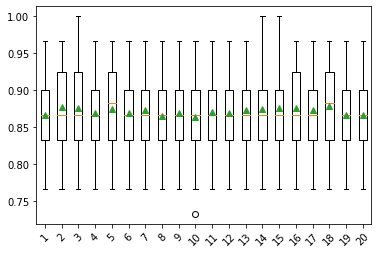

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]

for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))),
                               ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [3]:
# iterative imputation strategy and prediction for the hose colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()),
                           ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction

yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
